In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Here 'Wins' is our target label and remaning are our features



## Exploratory Data Analysis(EDA)

In [4]:
df.shape

(30, 17)

In this dataset we have 30 rows and 17 columns one of them is our target rest are features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

We used df.info method and got know that ERA is having float64 type value and rest are int64

In [6]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


It seems that there is no missing values in this dataset as every column has equal count (30) and also there is no much difference between 75% and 100%.

## To check null_value present

In [7]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

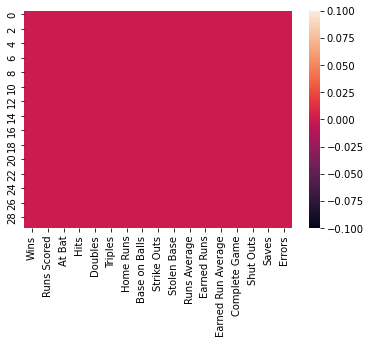

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

## To check skewness

In [11]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

As we can see here that skewness of certain columns of dataset are out of acceptable range(+/-.5) it means some outlier must be present there that need to be treated.

## Visualization & Removing Outliers

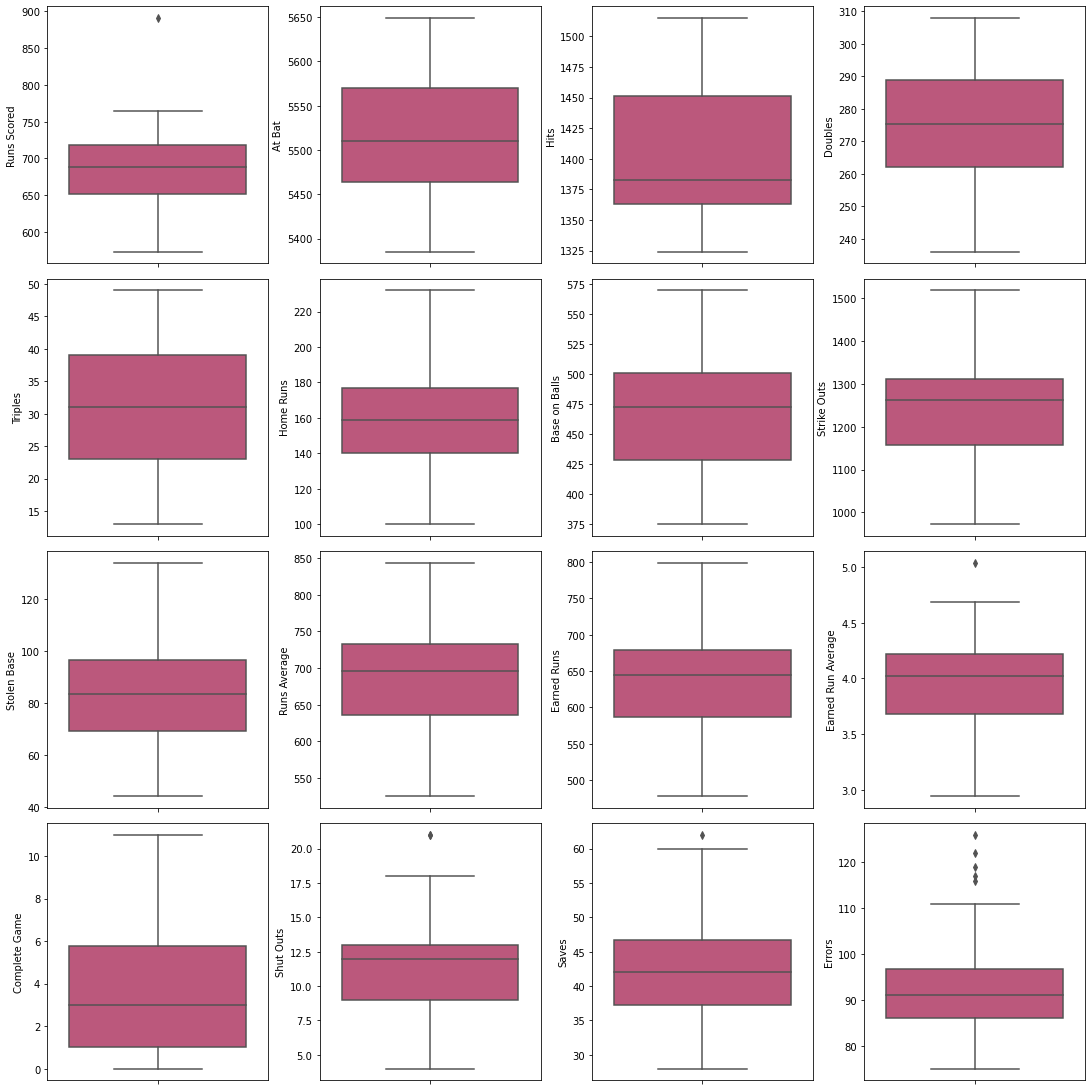

In [12]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Above boxplot telling us that there are some outlier present in Run score,Earn Run Average ,shut outs ,saves and Errors which is need to be treated befor making ML model.

In [13]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [14]:
threshold=3
print(np.where (z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [15]:
df_new=df[(z<3).all(axis=1)]

In [16]:
df_new.shape,df.shape

((29, 17), (30, 17))

In [17]:
loss=(30-29)*100/30
loss

3.3333333333333335

In [18]:
df=df_new
df.shape

(29, 17)

In [19]:
df.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

## Distplot

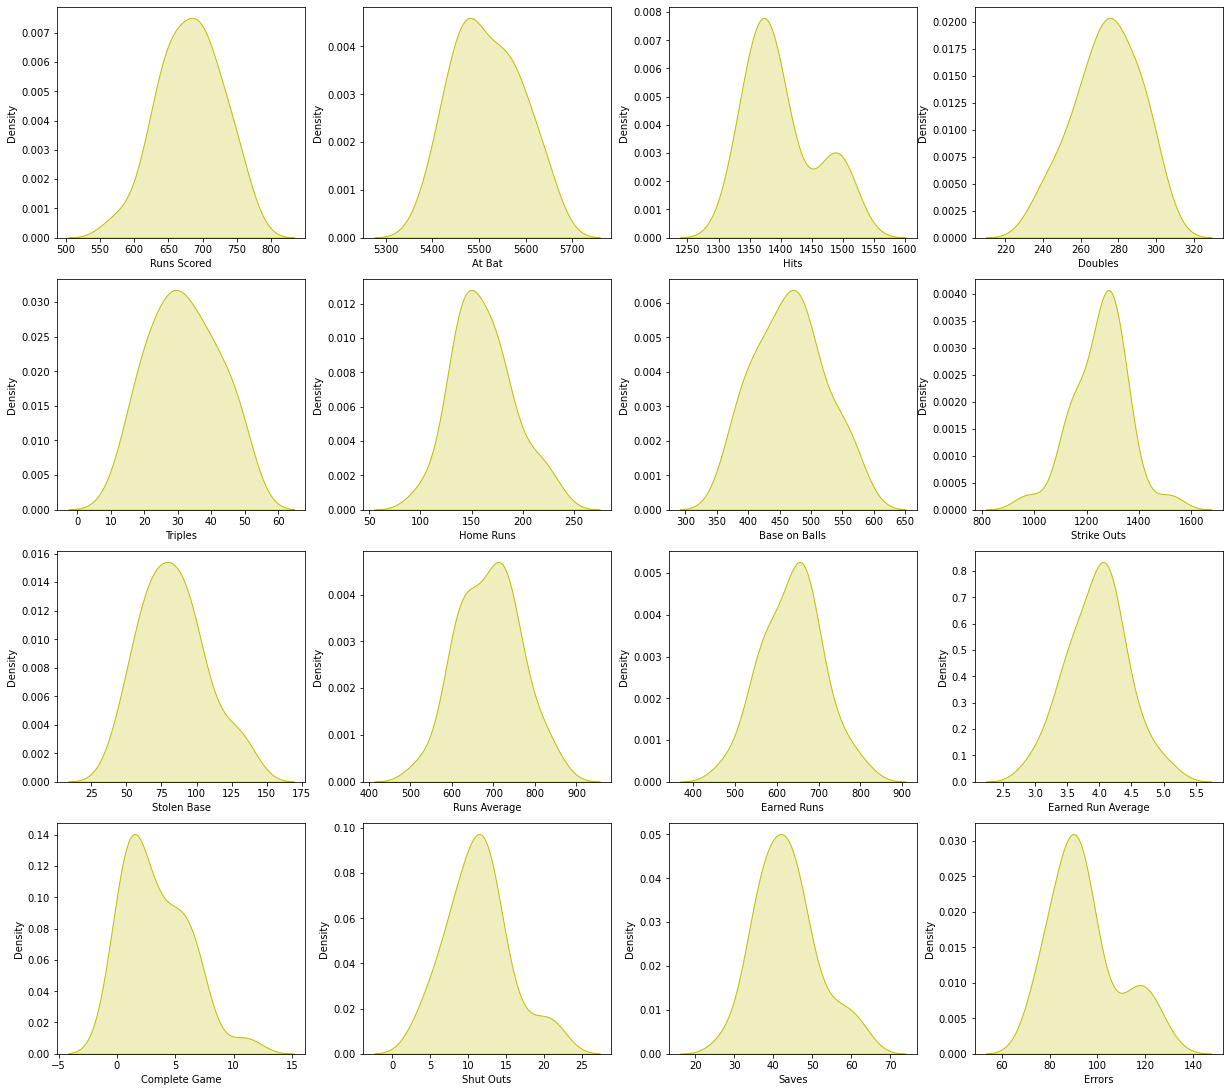

In [20]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From the above distplot graph we can say all the feature are more & less bell shaped or normalised shaped.

## Joint plot

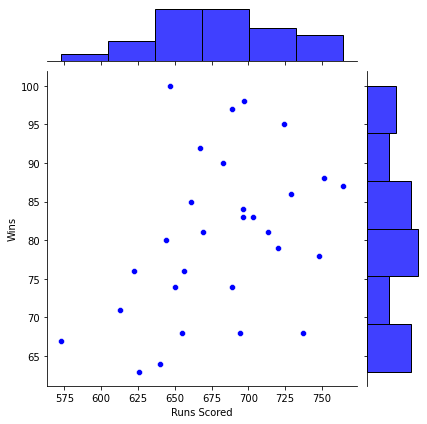

In [21]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="blue")
plt.show()

This graph telling a relation between Wins (target) & Run scored. As run score is getting higher the chance also becoming higher.

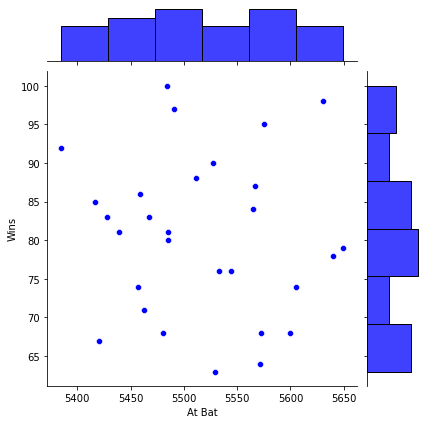

In [23]:
sns.jointplot(x="At Bat",y="Wins",data=df,color="blue")
plt.show()

In this jointplot we observe that wins are not perfectly dependend on Bat.

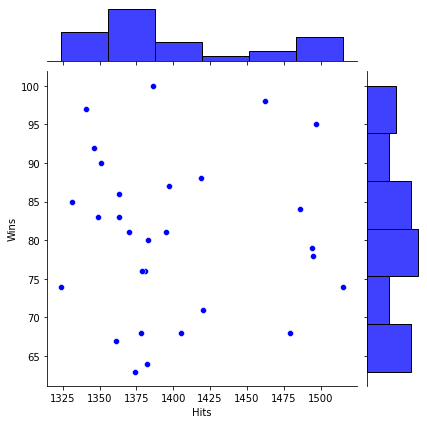

In [24]:
sns.jointplot(x="Hits",y="Wins",data=df,color="blue")
plt.show()

As the above plot we can observe that less the value of Hits more the chance of wins.

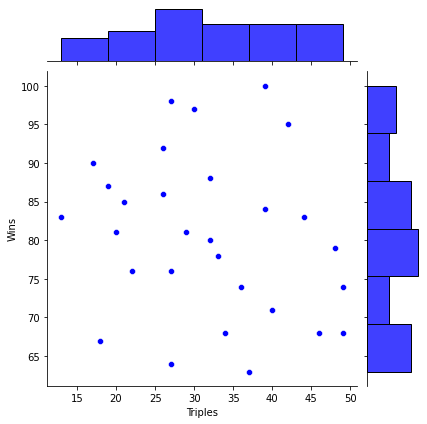

In [25]:
sns.jointplot(x="Triples",y="Wins",data=df,color="blue")
plt.show()

As this joint-plot we cannot find any linear relation between wins and Triples.

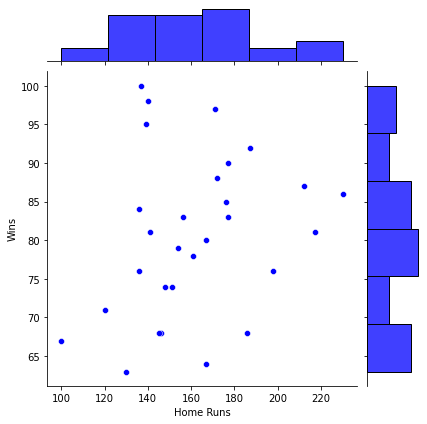

In [26]:
sns.jointplot(x="Home Runs",y="Wins",data=df,color="blue")
plt.show()

Above graph showing as Home Runs increase ,chance of wins also increases.

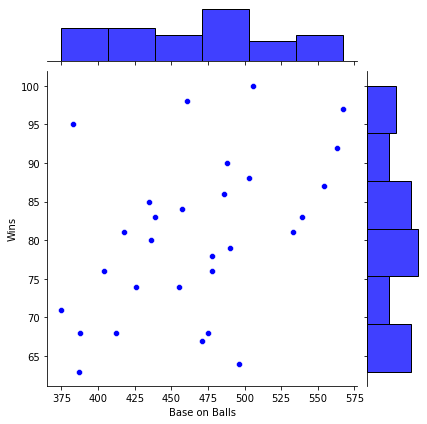

In [27]:
sns.jointplot(x="Base on Balls",y="Wins",data=df,color="blue")
plt.show()

Above graph explaining that if Base on Balls increase then wins chances also increases.

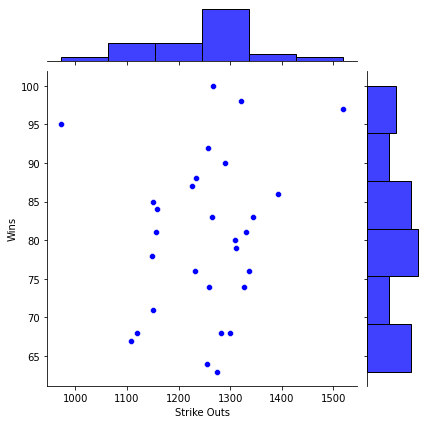

In [28]:
sns.jointplot(x="Strike Outs",y="Wins",data=df,color="blue")
plt.show()

Above graph is showing if Strike Outs stay between 1100 to 1400 then chances of wins is much higher.

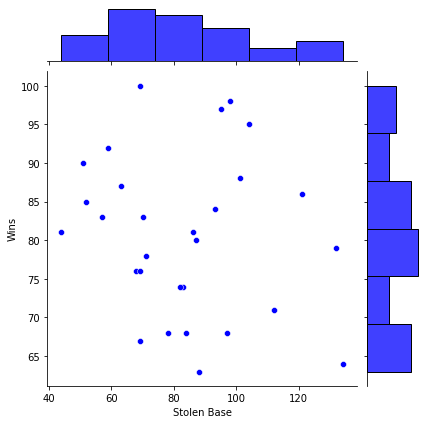

In [29]:
sns.jointplot(x="Stolen Base",y="Wins",data=df,color="blue")
plt.show()

Above plot telling the relation in such manner the Stolen Base between has negatively inpact on chances of Wins.

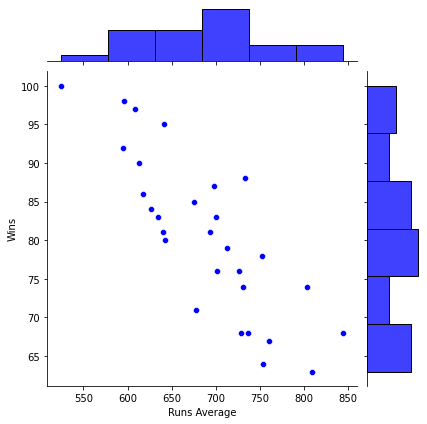

In [30]:
sns.jointplot(x="Runs Average",y="Wins",data=df,color="blue")
plt.show()

Above the graph showing Negative Relation between the Runs Average and wins.

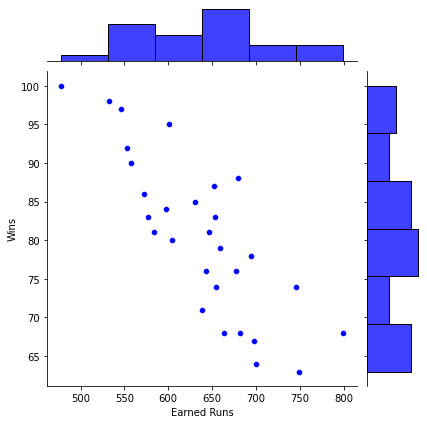

In [32]:
sns.jointplot(x="Earned Runs",y="Wins",data=df,color="blue")
plt.show()

Above observation telling a Negative relation between Earned Runs and Wins.

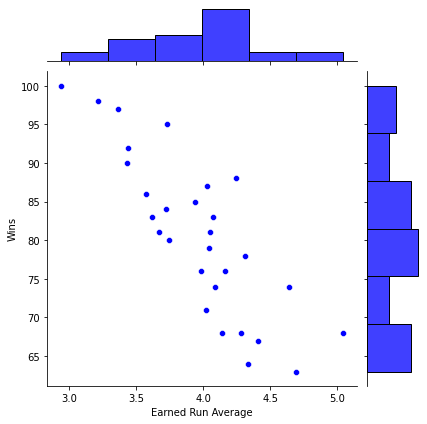

In [33]:
sns.jointplot(x="Earned Run Average",y="Wins",data=df,color="blue")
plt.show()

By the Above observation we can say that as Earned Run Average increase chances of wins decreases means this too is negatively related to each other.

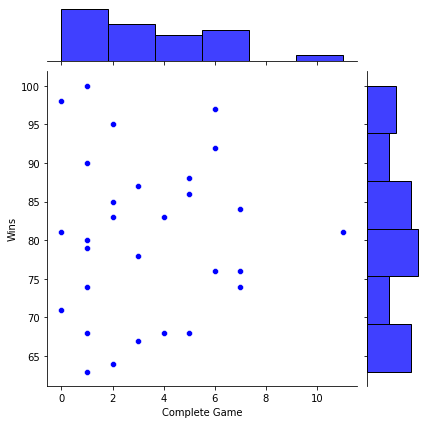

In [34]:
sns.jointplot(x="Complete Game",y="Wins",data=df,color="blue")
plt.show()

Above plot displaying that as increase complete Game,Wins also get increased.

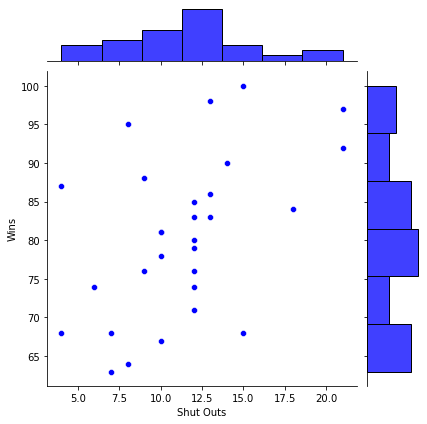

In [36]:
sns.jointplot(x="Shut Outs",y="Wins",data=df,color="blue")
plt.show()

Above displaying plot saying Wins and Shut Outs are positively related to each other.

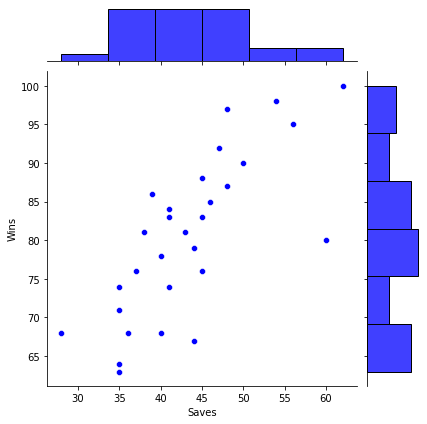

In [37]:
sns.jointplot(x="Saves",y="Wins",data=df,color="blue")
plt.show()

Above plot displaying Wins & Saves are positively related to each other.

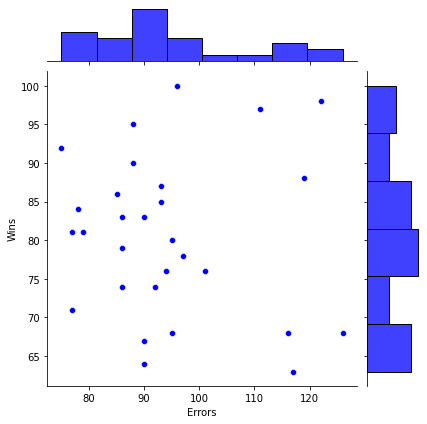

In [38]:
sns.jointplot(x="Errors",y="Wins",data=df,color="blue")
plt.show()

Above graph showing error is mostly present in the range of 70 to 100 which is badly impacted on Wins (target).

## LM-Plot

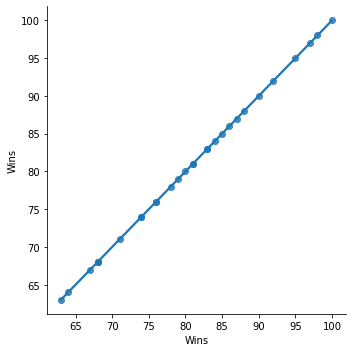

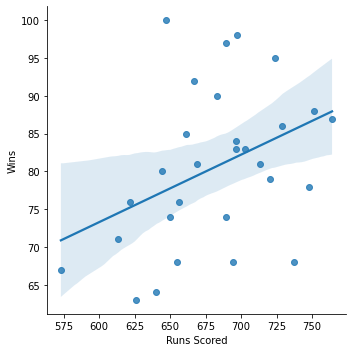

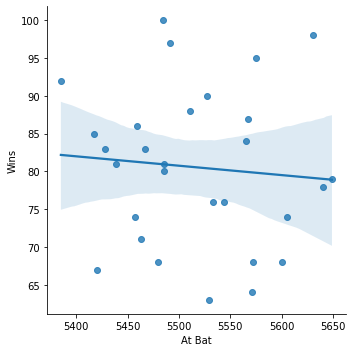

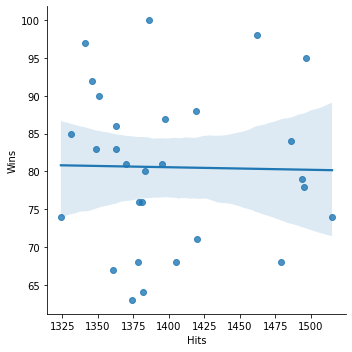

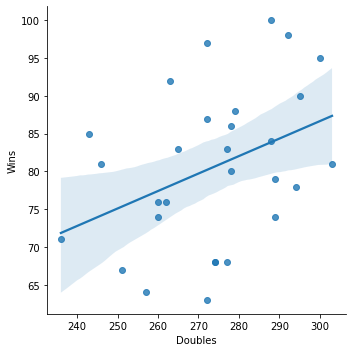

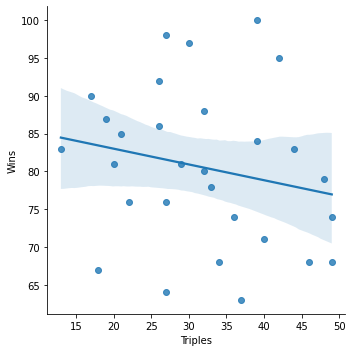

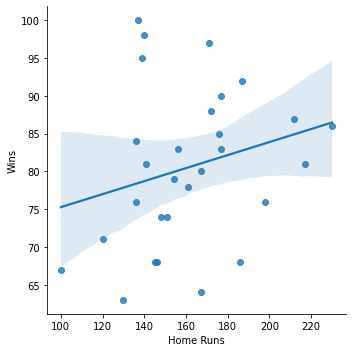

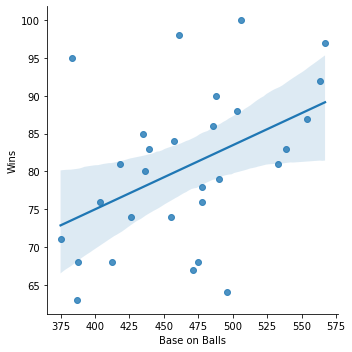

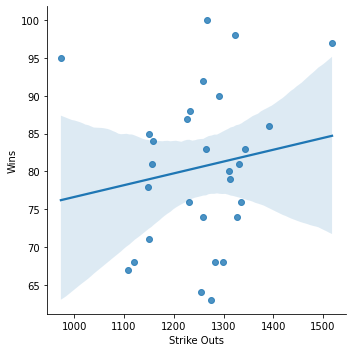

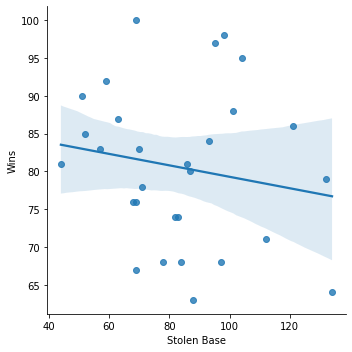

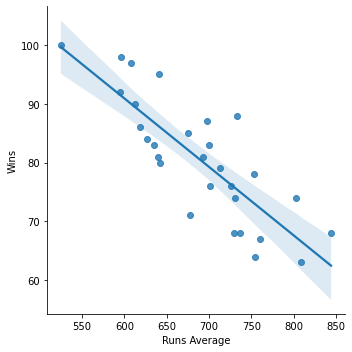

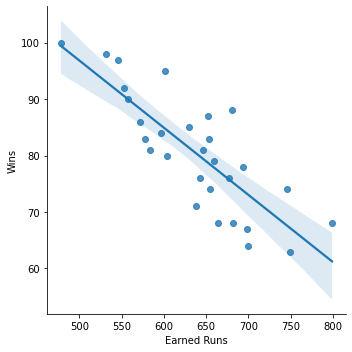

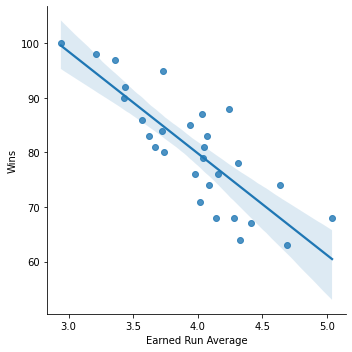

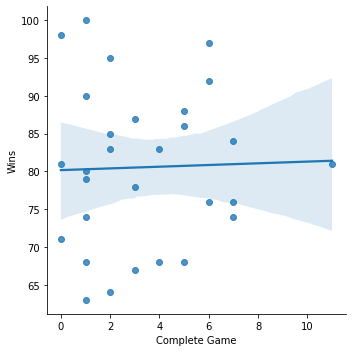

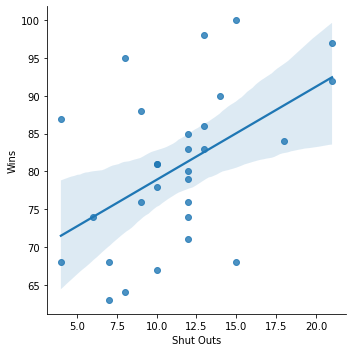

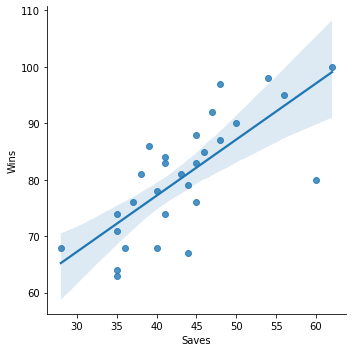

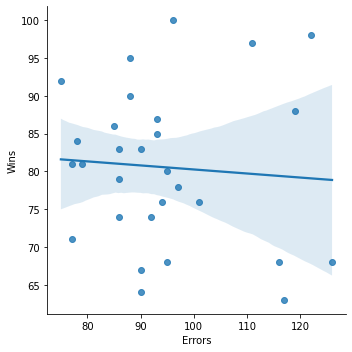

In [39]:
for i in df:
    sns.lmplot(x=i, y='Wins',data=df)

From above plot we can see that runs is directly proportional to wins, At Bats is inversely proportional to wins, Hits is not much impacted by Wins, Doubles is proportional to Wins, Triples is again proportional to Wins, Home runs is proportional to Wins, Walks is also proportional to wins, Strike out is proportional to wins, Stolen bases is proportional to Wins, Runs allowed is inversely proportional to Wins, Earned runs is again inversely proportional to Wins, Earned runs average is also inversely proportional to Wins, Wins is somewhat affected by the number of Complete Games, Wins is slightly affected by shut outs and Wins is directly propertional to Saves.

## Bar-Plot

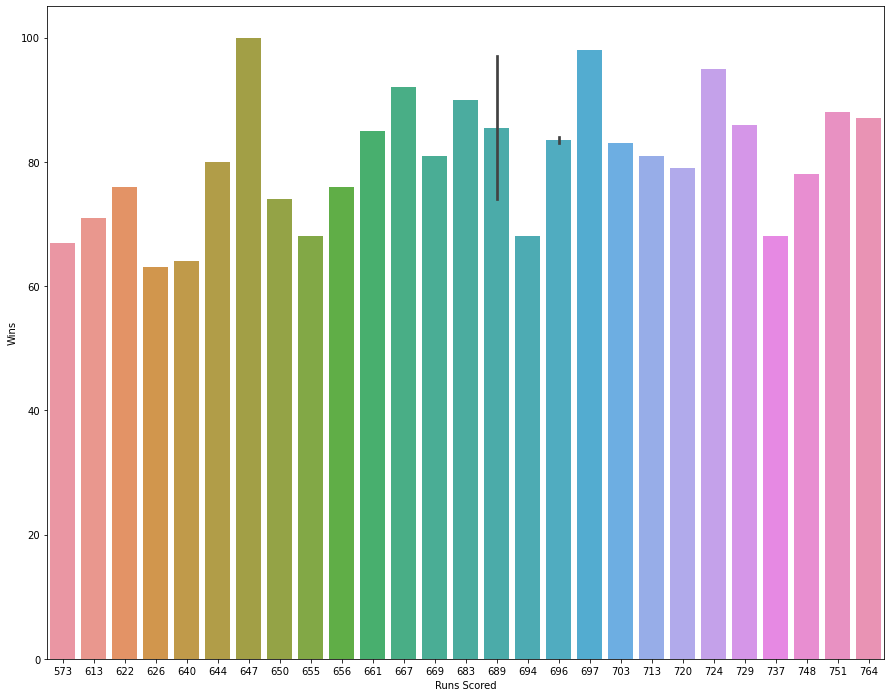

In [41]:
plt.figure(figsize=(15,12))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

Feature "Runs Scored" and it's unique values are distributed unevenly when it comes to relating with our label "Wins"

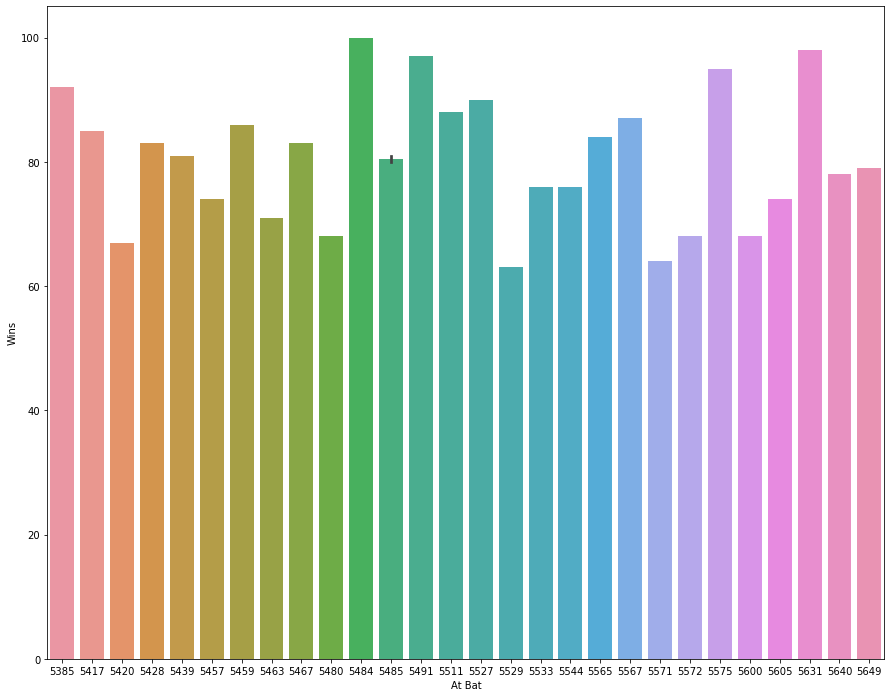

In [42]:
plt.figure(figsize=(15,12))
sns.barplot(x="At Bat",y="Wins",data=df)
plt.show()

Feature "At bat" and it's unique values are distributed unevenly when it comes to relating with our label "Wins".

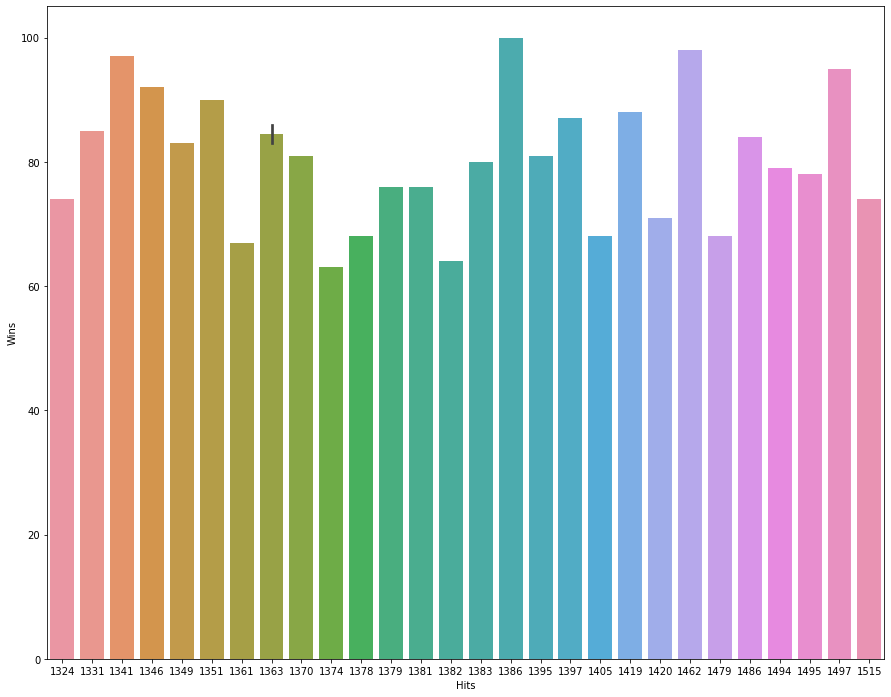

In [43]:
plt.figure(figsize=(15,12))
sns.barplot(x='Hits',y="Wins",data=df)
plt.show()

Feature "Hits" and it's unique values are distributed unevenly when it comes to relating with our label "Wins.

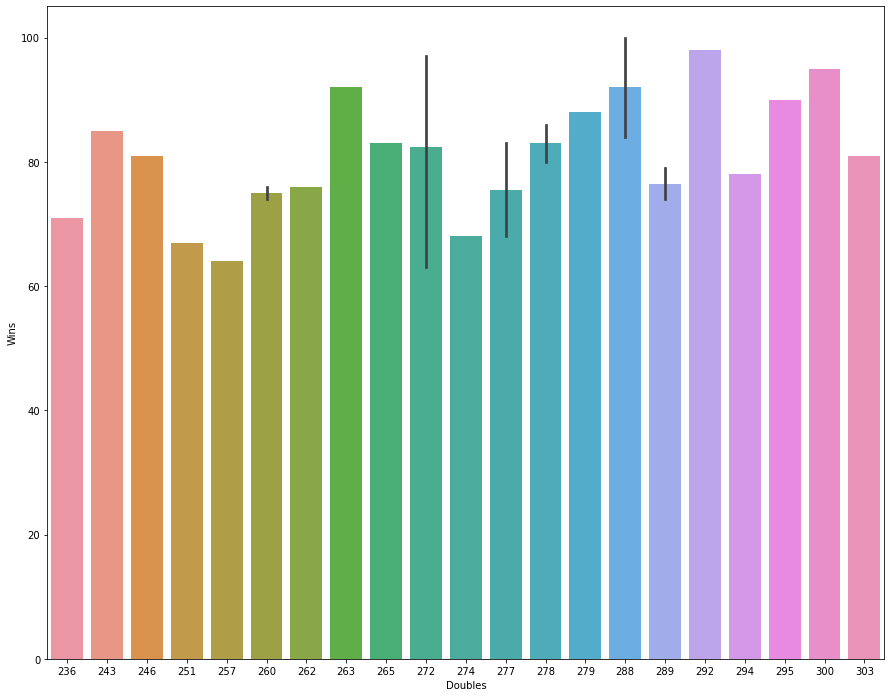

In [44]:
plt.figure(figsize=(15,12))
sns.barplot(x="Doubles",y="Wins",data=df)
plt.show()

Feature "Doubles" and it's unique values are distributed unevenly when it comes to relating with our label "Wins.

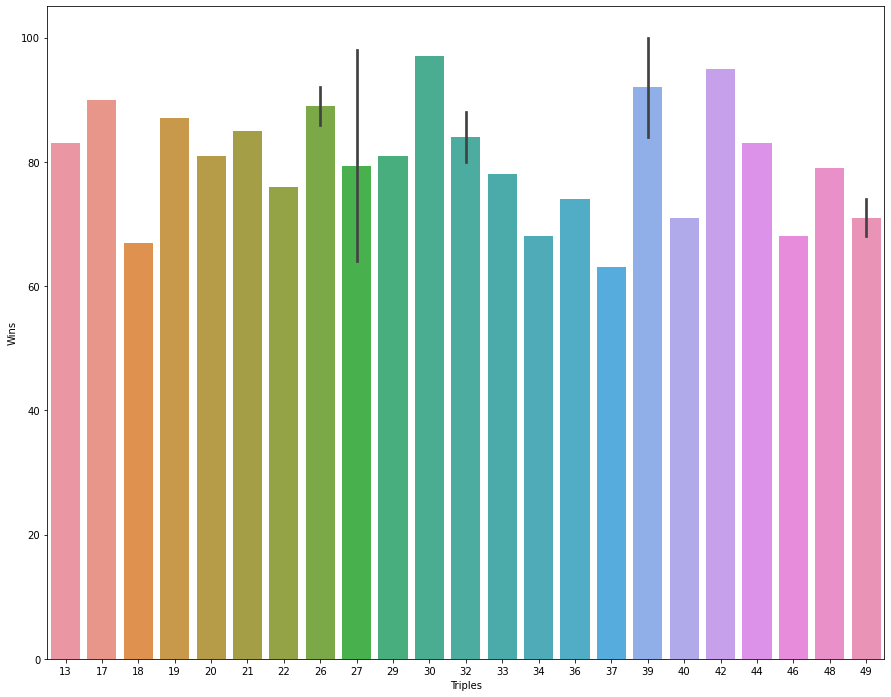

In [45]:
plt.figure(figsize=(15,12))
sns.barplot(x="Triples",y="Wins",data=df)
plt.show()

Feature "Triples" and it's unique values are distributed unevenly when it comes to relating with our label "Wins.

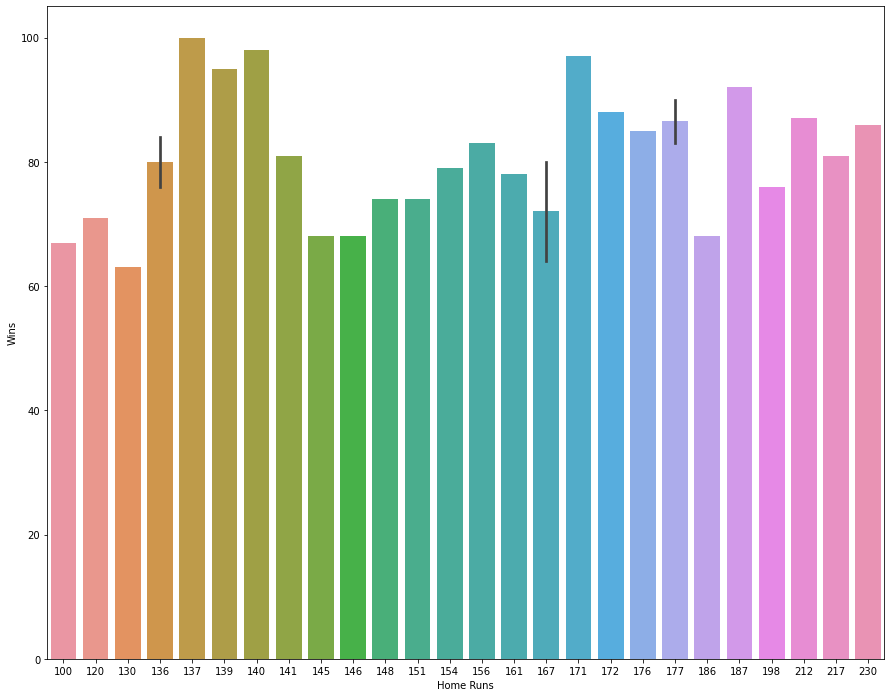

In [46]:
plt.figure(figsize=(15,12))
sns.barplot(x="Home Runs",y="Wins",data=df)
plt.show()

Feature "Home Run" and it's unique values are distributed unevenly when it comes to relating with our label "Wins.

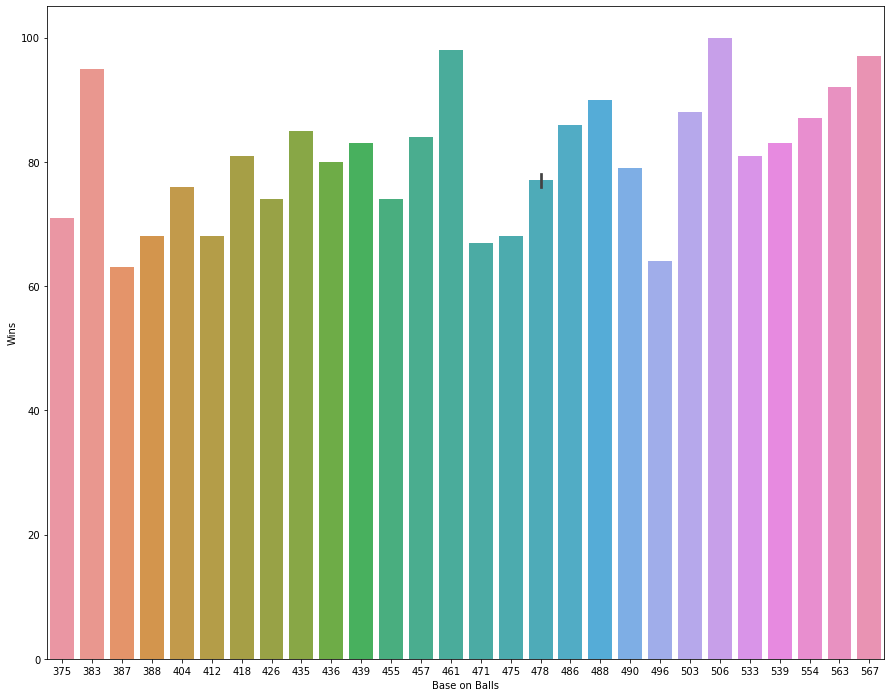

In [47]:
plt.figure(figsize=(15,12))
sns.barplot(x="Base on Balls",y="Wins",data=df)
plt.show()

Feature "Base on Balls" and it's unique values are distributed unevenly when it comes to relating with our label "Wins.

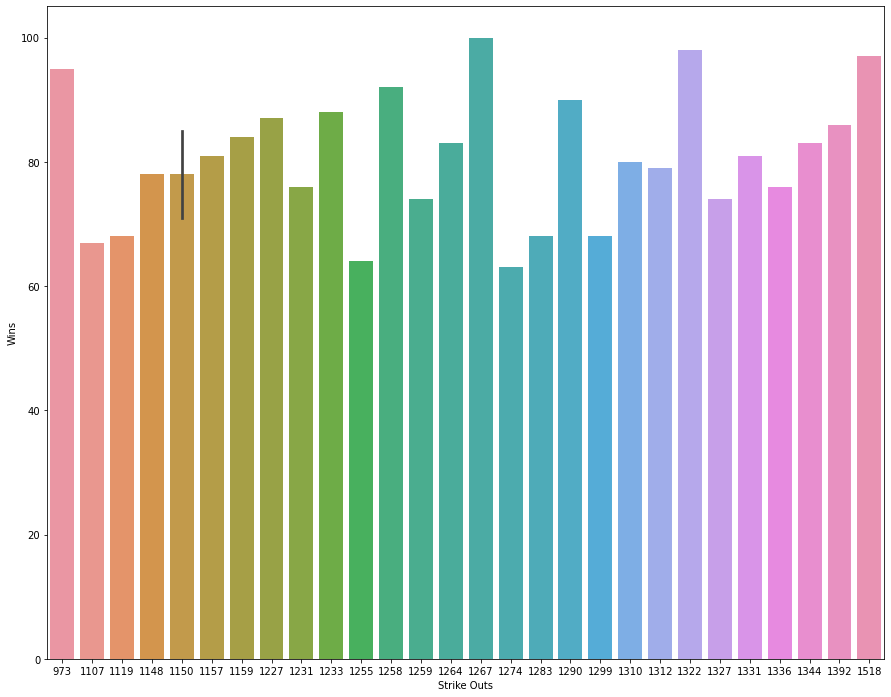

In [48]:
plt.figure(figsize=(15,12))
sns.barplot(x="Strike Outs",y="Wins",data=df)
plt.show()

Feature "Strike Outs" and it's unique values are distributed unevenly when it comes to relating with our label "Wins.

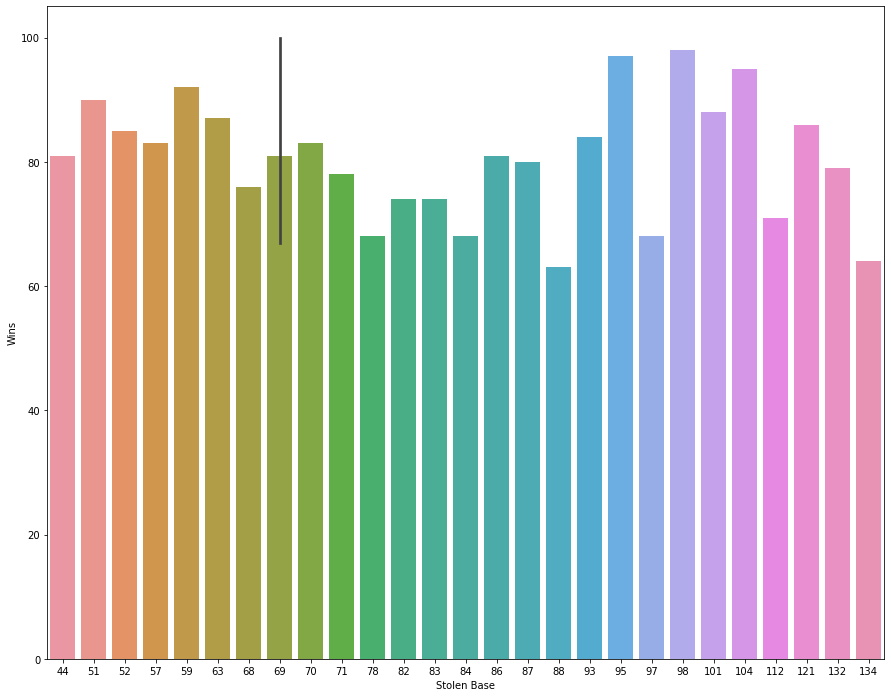

In [49]:
plt.figure(figsize=(15,12))
sns.barplot(x="Stolen Base",y="Wins",data=df)
plt.show()

Feature "Stolen Base" and it's unique values are distributed unevenly when it comes to relating with our label "Wins.

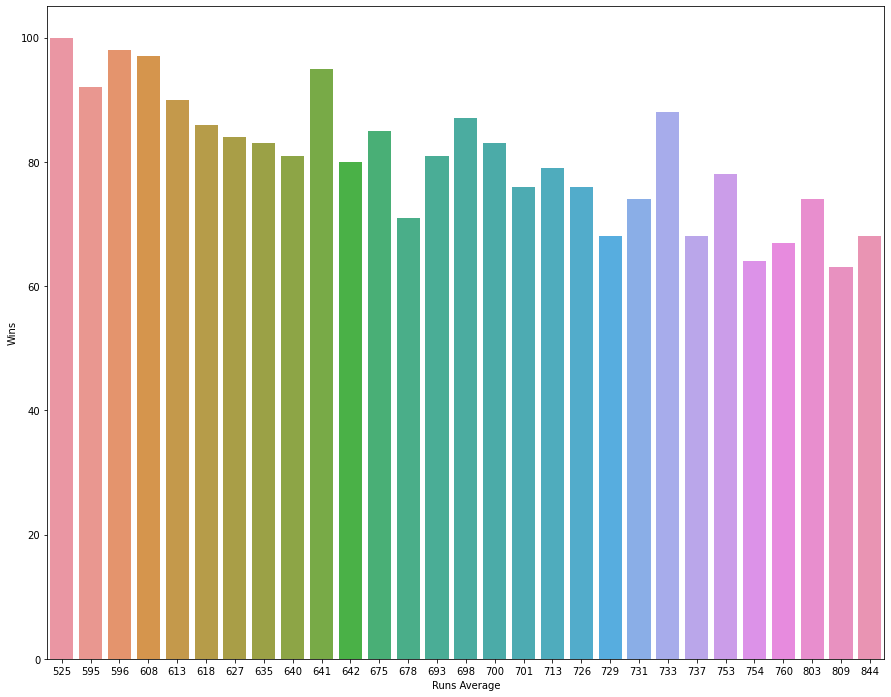

In [50]:
plt.figure(figsize=(15,12))
sns.barplot(x="Runs Average",y="Wins",data=df)
plt.show()

Feature "Runs Average" and it's unique values are distributed and decreasing as our label 'wins' increases.

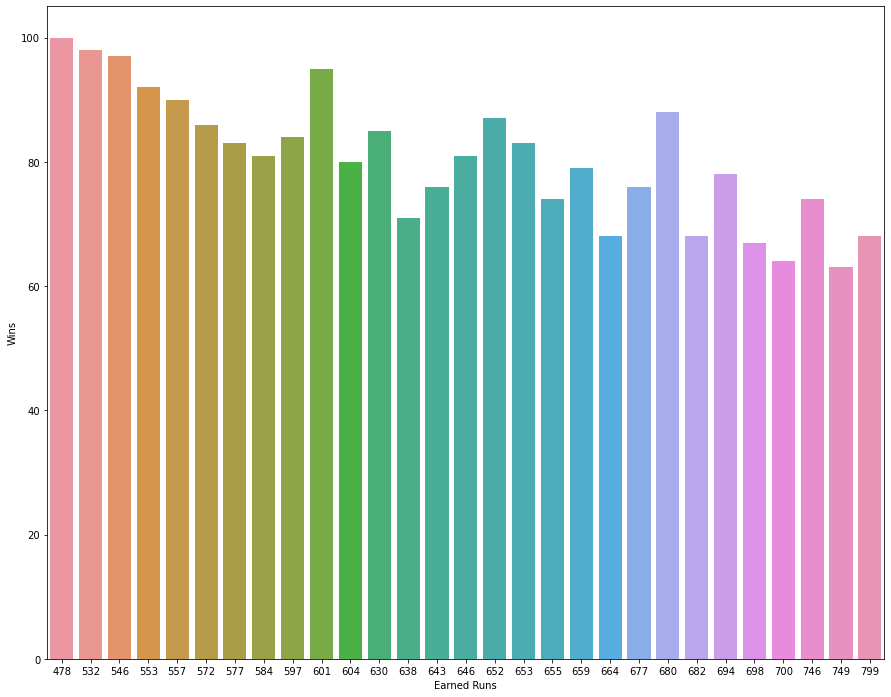

In [51]:
plt.figure(figsize=(15,12))
sns.barplot(x="Earned Runs",y="Wins",data=df)
plt.show()

Feature "Earned Run" and it's unique values are distributed and decreasing as our label 'wins' increases.

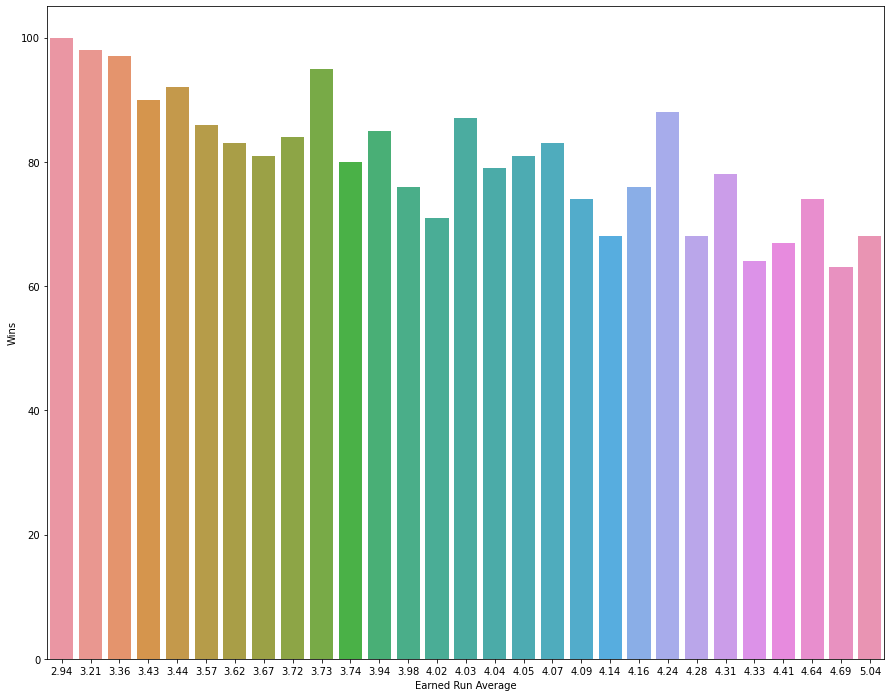

In [52]:
plt.figure(figsize=(15,12))
sns.barplot(x="Earned Run Average",y="Wins",data=df)
plt.show()

Feature "Earned Run Average" and it's unique values are distributed and decreasing as our label 'wins' increases.

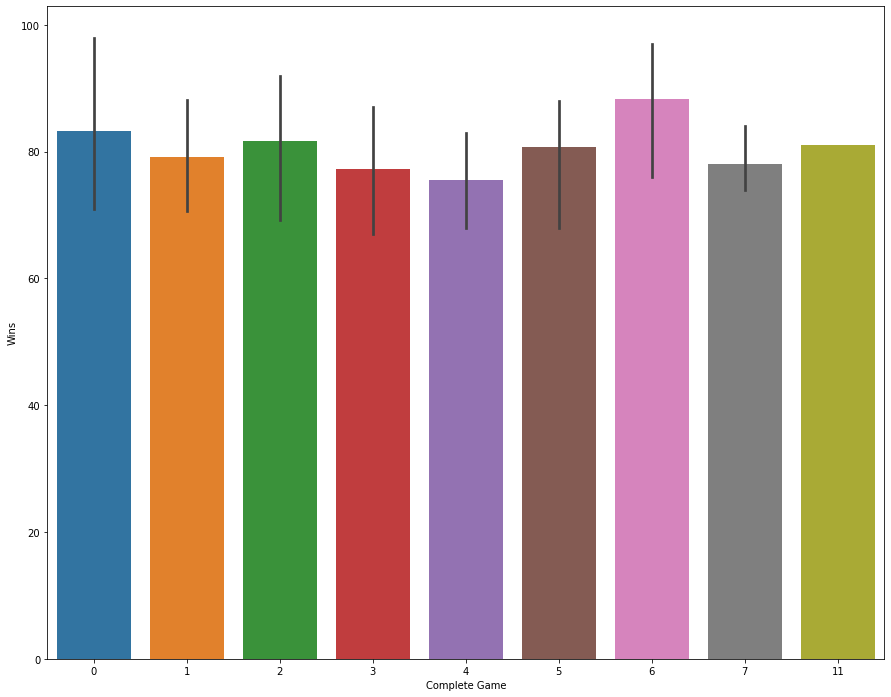

In [53]:
plt.figure(figsize=(15,12))
sns.barplot(x="Complete Game",y="Wins",data=df)
plt.show()

Feature "Complete Game" and it's unique values are distributed and no certain impact on target wins.

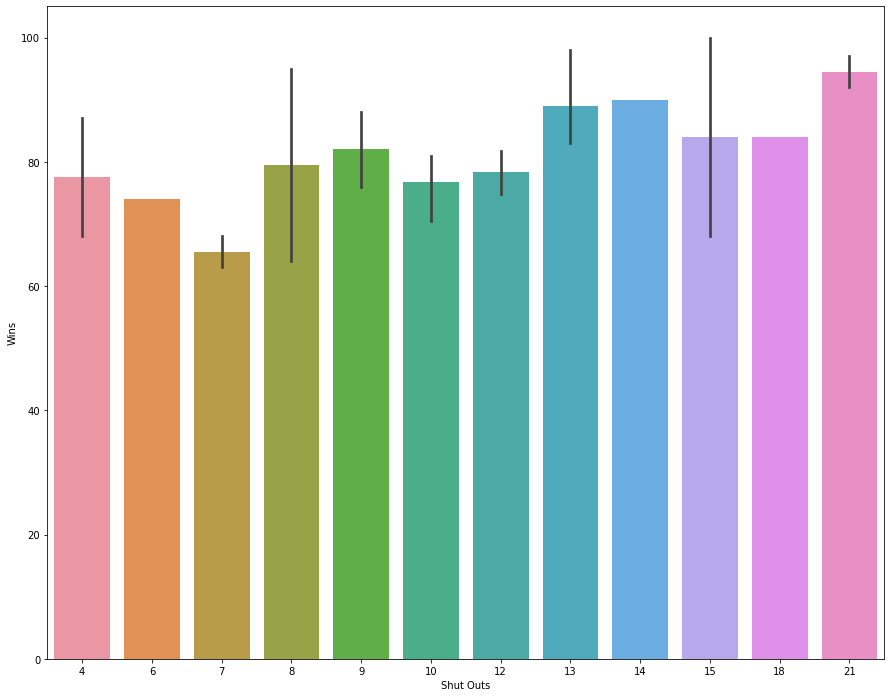

In [54]:
plt.figure(figsize=(15,12))
sns.barplot(x="Shut Outs",y="Wins",data=df)
plt.show()

Feature "Shut Outs" and it's unique values are distributed and not making certain impact on target label wins.

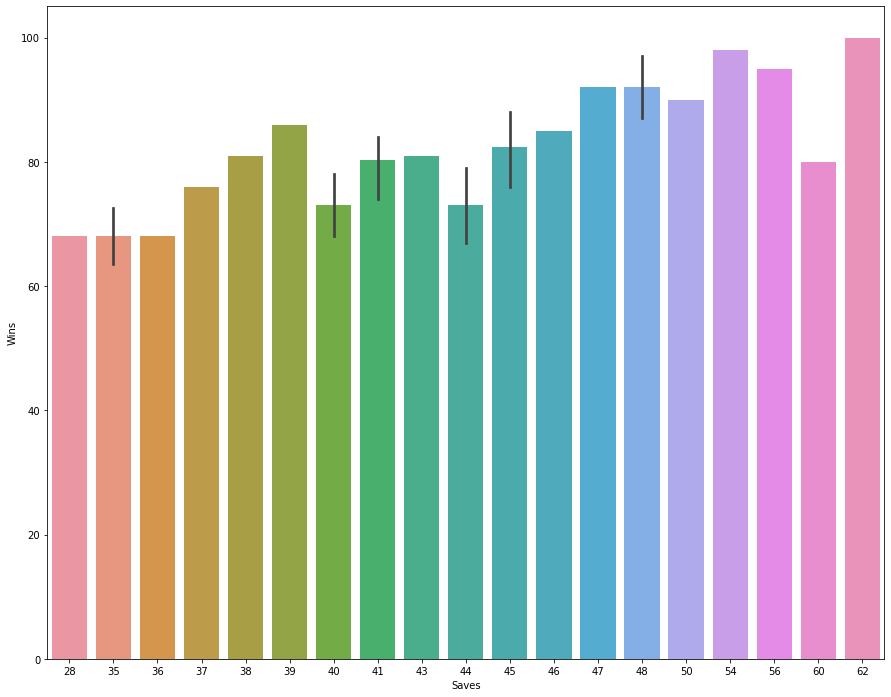

In [55]:
plt.figure(figsize=(15,12))
sns.barplot(x="Saves",y="Wins",data=df)
plt.show()

Feature "Saves" and it's unique values are distributed and increasing as our label 'wins' Dicreases.

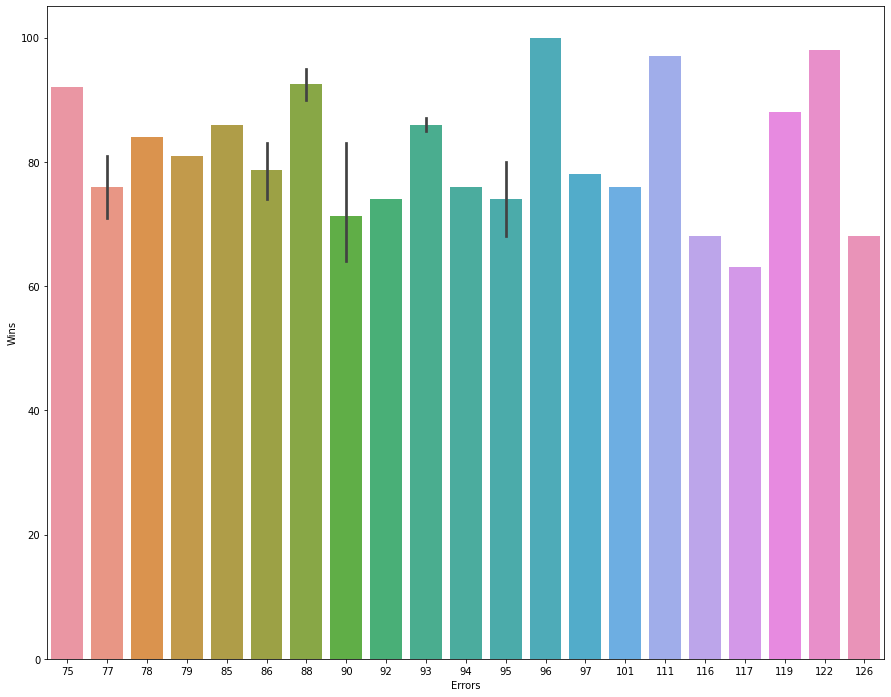

In [56]:
plt.figure(figsize=(15,12))
sns.barplot(x="Errors",y="Wins",data=df)
plt.show()

Feature "Error" and it's unique values are distributed and not making any specific impact on target label wins.

## Pair-plot

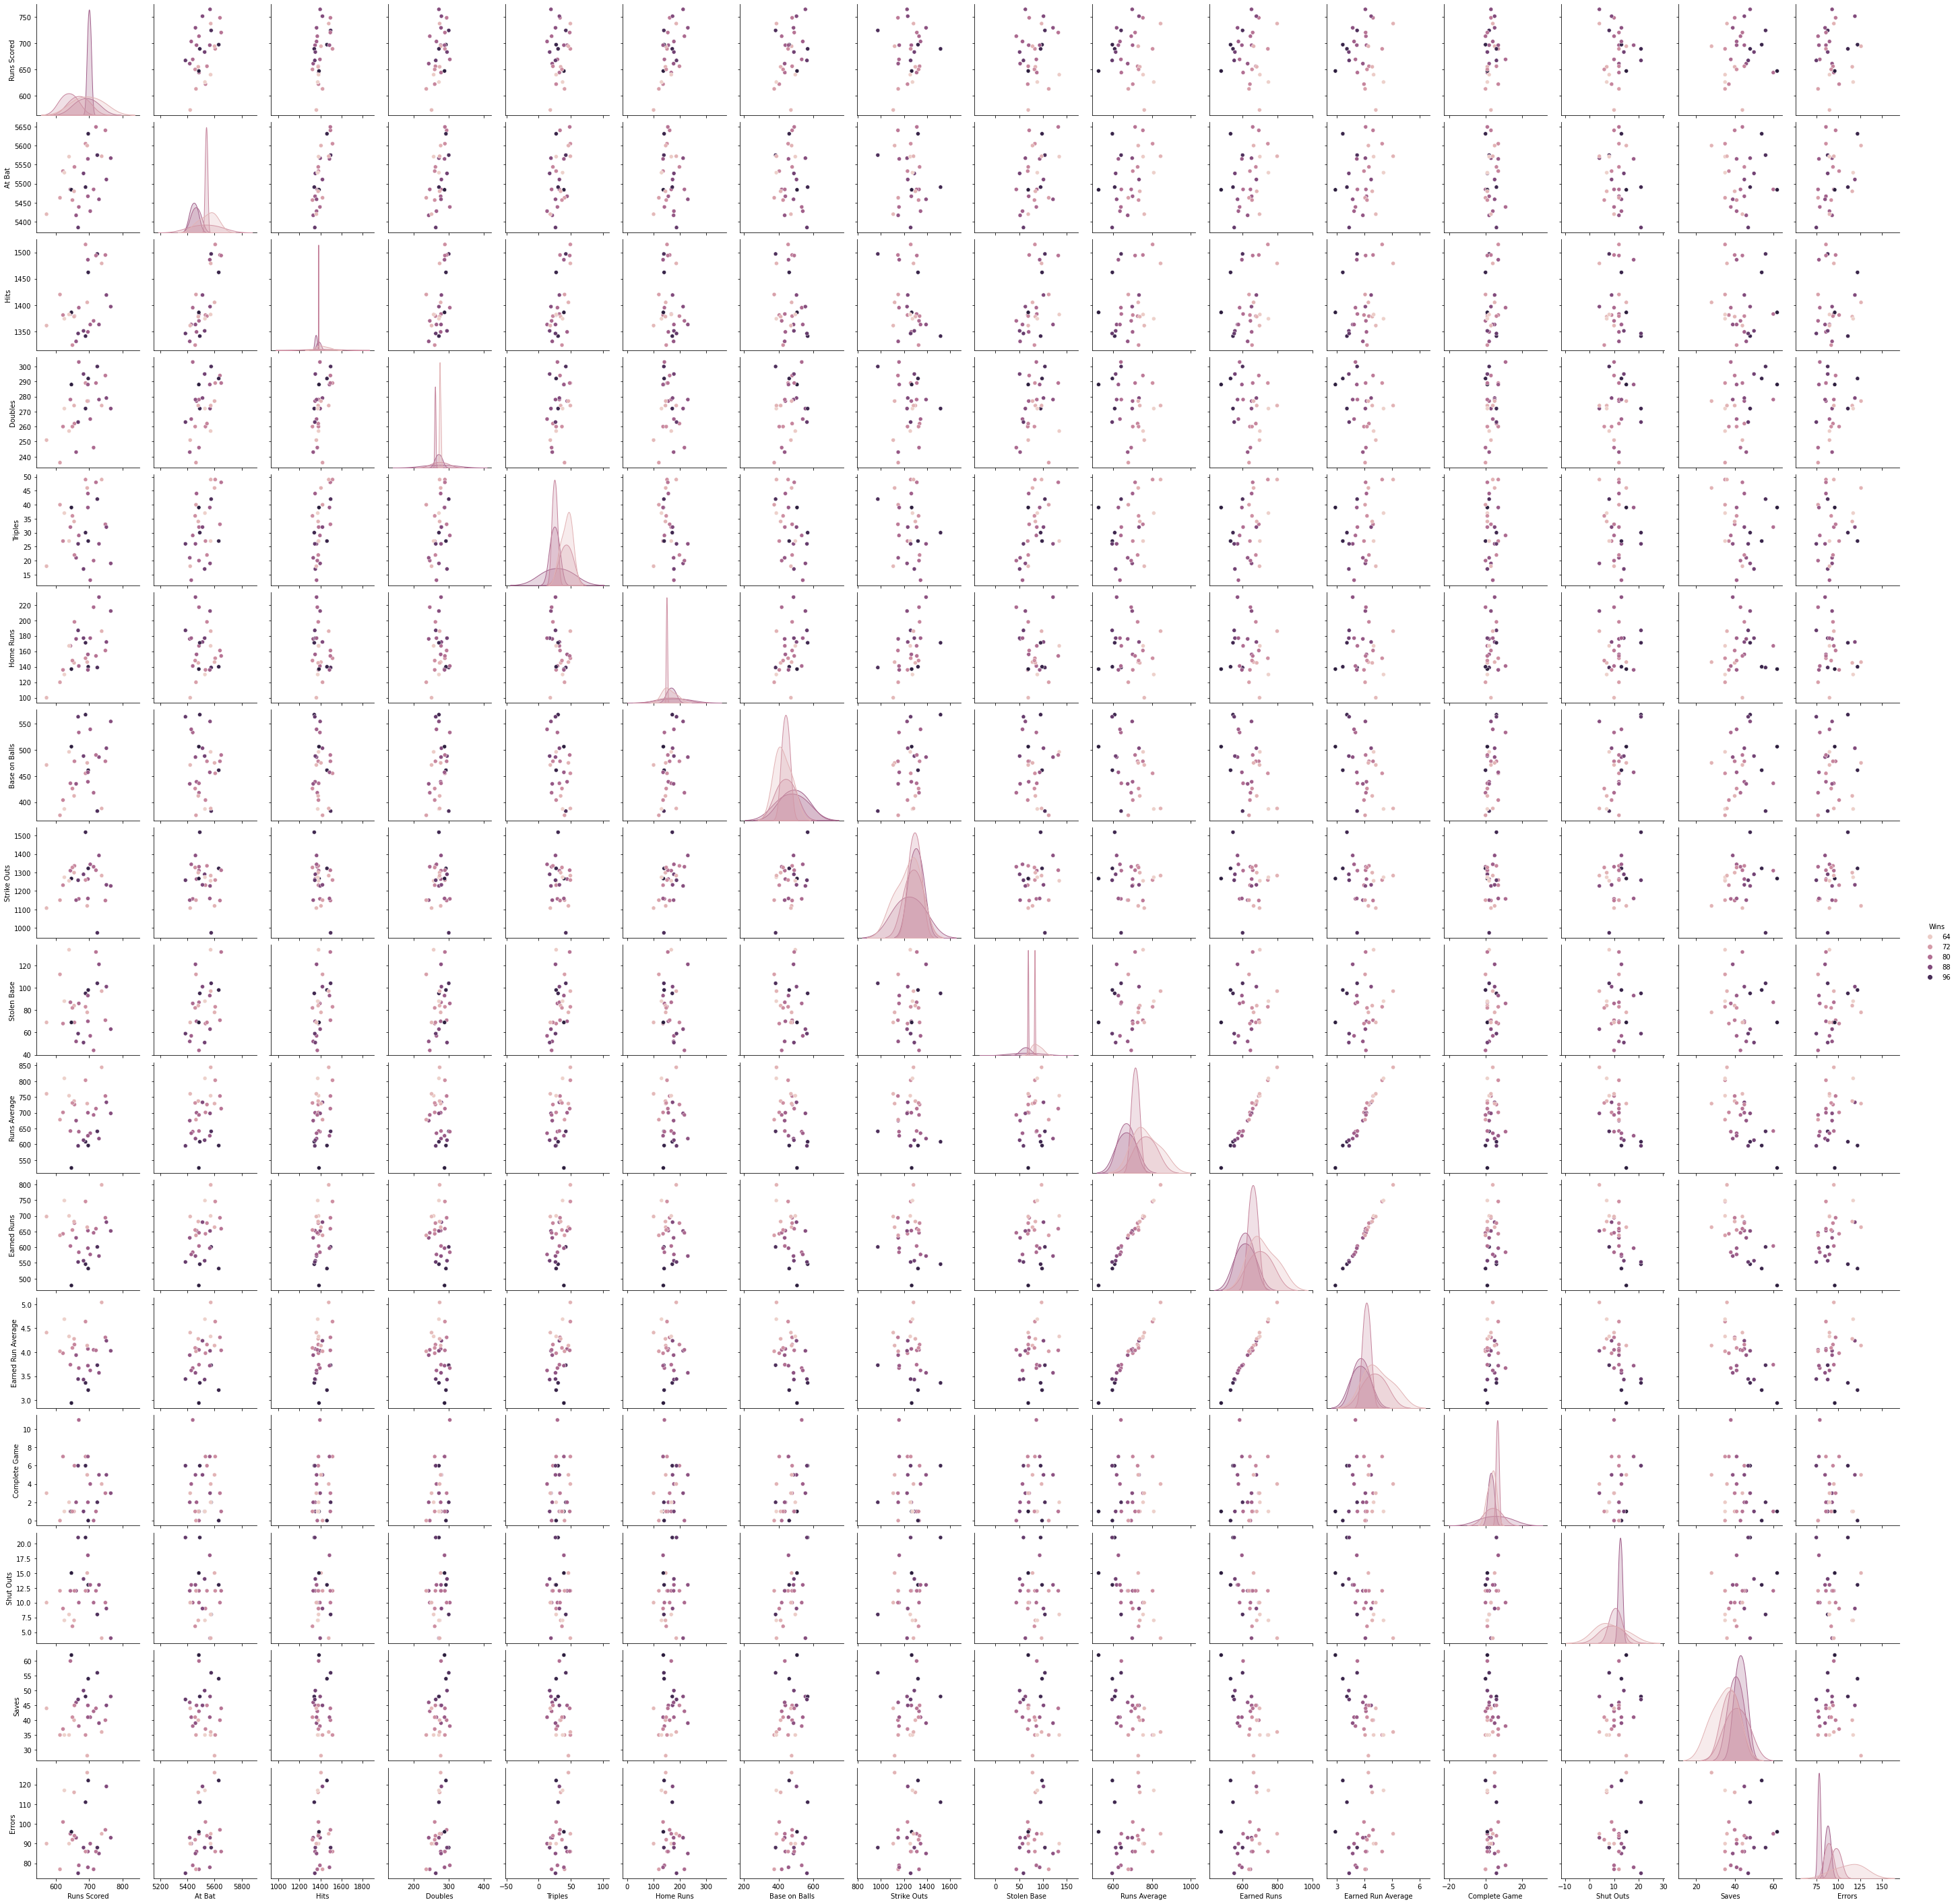

In [60]:
sns.pairplot(df,hue='Wins')
plt.show()

## Correletion using heatmap

## Positive correlation- A correlation of +1 showing perfect positive correlation ,mean both are moving in same directions


## Negative correlation -A correlationn of -1 indicates perfect negative correlation means both are moving in opposite direction

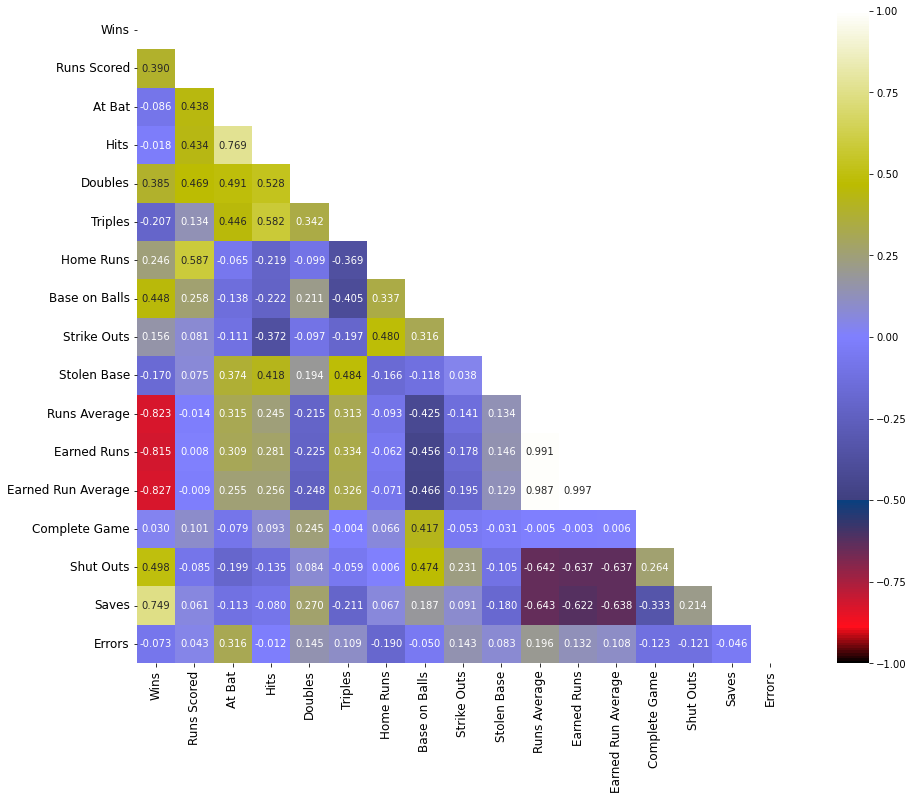

In [61]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As from the above heatmap we can conclude that feature like Earned Runs,Earned Run Average,Run Average are highly negative relative to our label 'Wins' and also they are also showing multicollearnity so it would be better to drop them here.

In [62]:
df.drop(['Earned Runs','Earned Run Average'],axis=1,inplace=True)

## Splitting the whole data set into two part namely x & y


In [63]:
x=df.drop('Wins',axis=1)
y=df['Wins']

## Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [66]:
x.head(5)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898


## Principle Component Analysis (PCA)

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca=PCA(n_components=14)
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)

In [69]:
x.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Complete Game,Shut Outs,Saves,Errors
0,-2.957996,-0.953253,2.246316,-1.216994,-2.357314,0.016125,0.626783,0.394846,0.882534,0.554004,-0.258275,-0.218896,-0.176119,0.192275
1,0.240394,0.417411,0.313526,-0.266703,-0.294763,0.504699,-0.962596,1.240400,0.256176,-0.827710,0.332404,-0.199270,-0.010978,0.486047
2,0.474141,-1.106621,0.911147,3.099281,-0.796596,-0.762581,1.542021,1.355597,-0.235204,0.159777,0.549155,0.082016,0.205976,-0.116133
3,-0.109473,1.848198,0.163538,1.093046,0.300077,-1.019805,-0.127039,0.024300,-0.562258,1.324900,-0.151055,-0.102882,0.737932,0.222658
4,-2.909976,-0.777732,-0.319362,1.853279,-0.148994,0.213535,-1.046595,0.188747,-1.268692,-0.264274,-0.364419,0.118457,-0.147223,-0.268420
5,0.667623,-1.404411,-2.424945,-0.966726,-1.725726,-1.119576,1.016351,-0.453021,0.101003,-0.685705,-0.280422,-0.149604,0.698599,-0.025234
6,1.947763,0.997051,-2.042951,-1.258751,-1.728523,0.792559,-1.306637,-0.455940,-0.201846,0.328548,0.206196,0.220391,0.094941,-0.003327
7,0.939941,-0.062020,1.197914,-1.850466,0.162508,0.548143,0.150741,0.700940,-0.481820,0.298089,-0.687803,-0.378809,-0.342151,-0.146316
8,-2.383972,-1.433303,-0.623188,-0.034015,-1.169926,-1.165087,-0.411894,-0.856657,-0.244877,-0.377093,0.350590,0.165218,-0.282090,0.028534
9,-0.883912,-1.117449,-1.155980,-0.166050,0.614701,-1.047468,0.786800,0.361866,1.213722,-0.148495,-0.822724,0.475524,-0.306328,0.150268


## Power Transformation

In [70]:
from sklearn.preprocessing import PowerTransformer

In [71]:
pt=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(pt.fit_transform(x),columns=x.columns)

In [72]:
x.skew()

Runs Scored      0.019135
At Bat           0.138663
Hits             0.002219
Doubles          0.010464
Triples          0.012446
Home Runs        0.073433
Base on Balls    0.004156
Strike Outs      0.028031
Stolen Base     -0.068430
Runs Average     0.049740
Complete Game    0.061566
Shut Outs        0.019880
Saves            0.046013
Errors           0.003803
dtype: float64

Now we can say in our dataset no skewness is present.

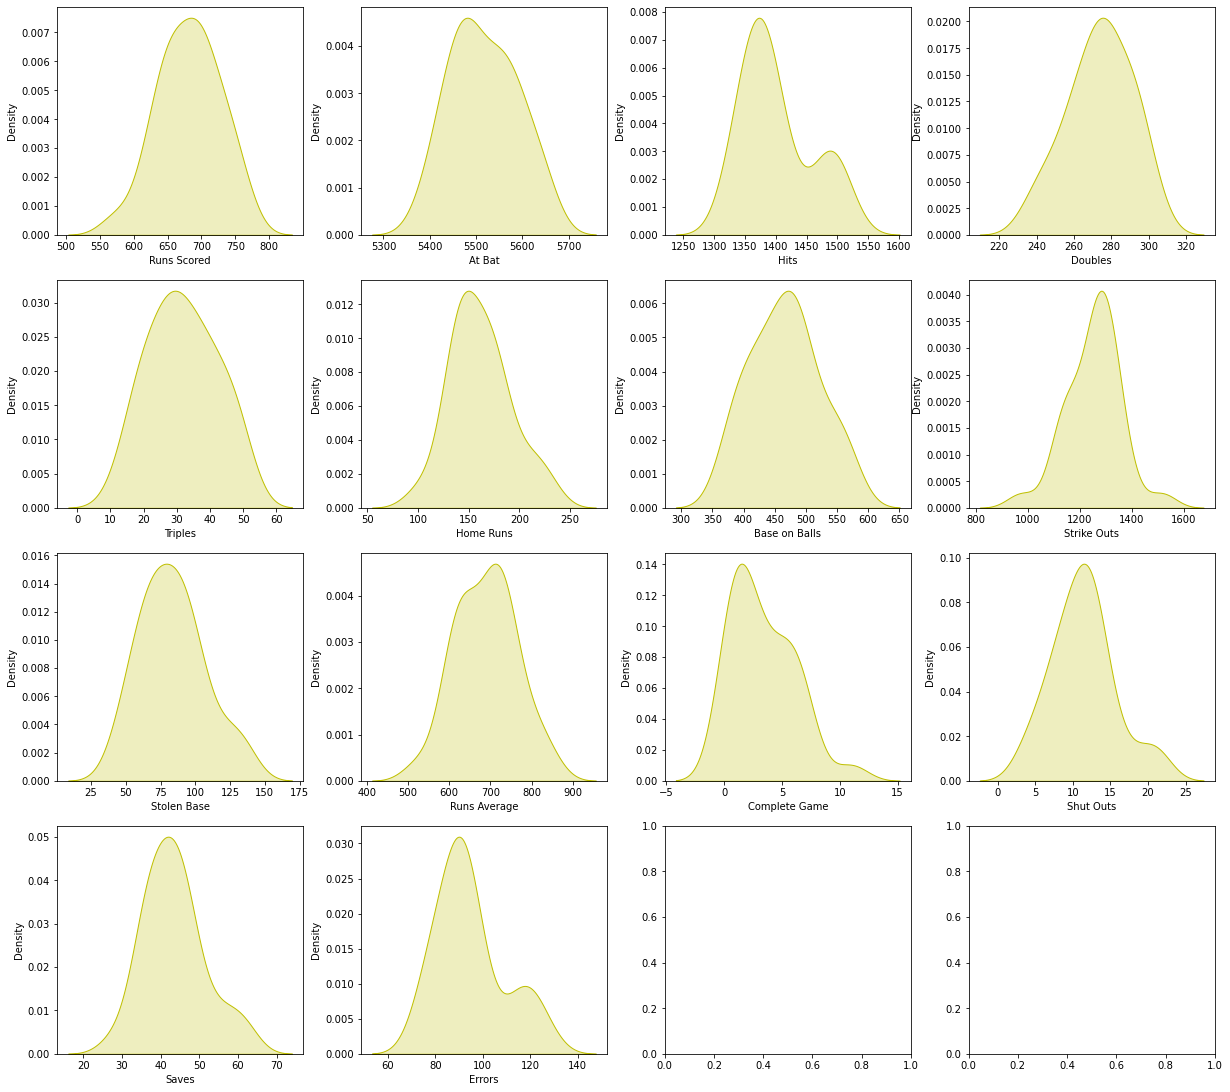

In [73]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,1.006200
1,At Bat,1.017150
2,Hits,1.005998
3,Doubles,1.007102
4,Triples,1.005601
5,Home Runs,1.011452
6,Base on Balls,1.013386
7,Strike Outs,1.007557
8,Stolen Base,1.010934
9,Runs Average,1.002451


VIF value of each feature is less than 10 so we dont need to do anything with them.

## Finding best random state for building Regression Models

In [76]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9354003731394078 on Random State 708


## Train test split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=708)

In [78]:
x_train.shape,y_test.shape

((21, 14), (8,))

## Machine Learning Model for Regression with Evaluation Metrics

In [79]:
# Regression Model Function

def reg(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [80]:
#linear Regression
model=LinearRegression()
reg(model,x,y)

RMSE Score is: 7.3018378978136
R2 Score is: 62.893893563499304
Cross Validation Score: 23.061116261342
R2 Score - Cross Validation Score is 39.832777302157304


In [81]:
#lasso
model=Lasso()
reg(model,x,y)

RMSE Score is: 9.697369726894376
R2 Score is: 34.55312423134406
Cross Validation Score: 1.5406190041619205
R2 Score - Cross Validation Score is 33.01250522718214


In [82]:
#Ridge
model=Ridge()
reg(model,x,y)

RMSE Score is: 7.593452851598381
R2 Score is: 59.870882150884675
Cross Validation Score: 28.93967275680756
R2 Score - Cross Validation Score is 30.931209394077115


In [83]:
#support vector Regressor
model=SVR()
reg(model,x,y)

RMSE Score is: 11.876092559108649
R2 Score is: 1.8414444732382185
Cross Validation Score: -41.55545075082297
R2 Score - Cross Validation Score is 43.39689522406119


In [84]:
#DecisionTreeRegressor
model=DecisionTreeRegressor()
reg(model,x,y)

RMSE Score is: 9.72111104761179
R2 Score is: 34.232274902131365
Cross Validation Score: -118.5856344404281
R2 Score - Cross Validation Score is 152.81790934255946


In [85]:
#RandomForestRegressor
model=RandomForestRegressor()
reg(model,x,y)

RMSE Score is: 8.880721395247122
R2 Score is: 45.11198782079166
Cross Validation Score: -38.479493413230074
R2 Score - Cross Validation Score is 83.59148123402173


In [86]:
#AdaBoostRegressor
model=AdaBoostRegressor()
reg(model,x,y)

RMSE Score is: 9.784135546384396
R2 Score is: 33.37673187297248
Cross Validation Score: -35.327105013953414
R2 Score - Cross Validation Score is 68.7038368869259


In [87]:
#KNeighborsRegressor
model= KNeighborsRegressor()
reg(model,x,y)

RMSE Score is: 10.363638357256589
R2 Score is: 25.250978686385352
Cross Validation Score: -41.071238798793814
R2 Score - Cross Validation Score is 66.32221748517917


## Hyper Parameter Tuning For best ML Model

In [88]:
#choosing Ridge
param={'alpha':[.01,.1,1,10,10],'fit_intercept':['True','False'],'normalize':['True','False'],'solver':['auto','svd','Isqr','sag','saga']}

In [89]:
model=Ridge()

In [90]:
grid=GridSearchCV(estimator=Ridge(),param_grid=param,cv=5)

In [91]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 10],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False'],
                         'solver': ['auto', 'svd', 'Isqr', 'sag', 'saga']})

In [92]:
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 10],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False'],
                         'solver': ['auto', 'svd', 'Isqr', 'sag', 'saga']})
0.10815924149275673
1
{'alpha': 1, 'fit_intercept': 'True', 'normalize': 'False', 'solver': 'saga'}


In [93]:
grid.best_params_

{'alpha': 1, 'fit_intercept': 'True', 'normalize': 'False', 'solver': 'saga'}

In [94]:
Final_Model=Ridge(alpha=1,fit_intercept=True,normalize=True,solver='saga')
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 35.045758658417746


I have succesfully done hyper parameteer tuning with my model and have r2 value.

In [95]:
import joblib

In [99]:
filename="Final_Model_01"
joblib.dump(Final_Model, filename)

['Final_Model_01']